# Neural Network:
## Case I: Early Stopping:

Early stopping is a technique used in training machine learning models, including neural networks, to prevent overfitting and improve generalization. 
- In the context of spam classification, a neural network learns to distinguish between spam and non-spam emails using features extracted from the email content. 
- Early stopping helps prevent the model from becoming too specialized on the training data, enhancing its generalization to new, unseen emails. 

By detecting when the model's performance on validation data starts declining, early stopping ensures the network stops training before overfitting occurs, leading to a more effective and accurate spam classifier.

### Importing Libraries & Dataset:

In [1]:
import numpy as np
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from keras.models import load_model
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.shape

(5572, 2)

In [4]:
# Duplicates Check:
df.duplicated().sum()

415

In [5]:
# Drop the duplicates:
df.drop_duplicates(inplace = True)
df.shape

(5157, 2)

In [6]:
# Check for Null entries:
df.isnull().sum()

Category    0
Message     0
dtype: int64

### Data Preprocessing:

In [7]:
# Column that only has words & space.
words = []
for i in df['Message']:
    i = i.lower()
    i = re.sub("[^a-z0-9 ]", '', i)
# Removing everything except space & a-z.
    words.append(i)

df['Words'] = words
df.head()

,Category,Message,Words
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...


In [8]:
le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])
df.head()

,Category,Message,Words
0,0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...


### Model Training:

In [9]:
tvf = TfidfVectorizer()
X = tvf.fit_transform(df['Words']).toarray() # Convert to NumPy Array
y = df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
print(X_train.shape)
print(X_test.shape)

(3867, 9539)
(1290, 9539)


**Batch Normalization** is a neural network optimization technique that normalizes intermediate outputs within mini-batches during training. It reduces internal covariate shifts, making optimization more stable and accelerating convergence. 

In [10]:
nn = Sequential()

# 1st Hidden Layer:
nn.add(Dense(128, input_dim = X_train.shape[1], activation = 'relu'))
nn.add(Dropout(0.3))
nn.add(BatchNormalization())

# 2nd Hidden Layer:
nn.add(Dense(64, activation = 'relu'))
nn.add(Dropout(0.3))
nn.add(BatchNormalization())

# 3rd Hidden Layer:
nn.add(Dense(32, activation = 'relu'))
nn.add(Dropout(0.3))
nn.add(BatchNormalization())

# Output Layer:
nn.add(Dense(1, activation = 'sigmoid'))

nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1221120   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                        

In [11]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5)
nn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
hist = nn.fit(X_train, y_train, callbacks = early_stop, epochs = 200, validation_split = 0.2, batch_size = 10)

Epoch 1/200
310/310 [==============================] - 7s 16ms/step - loss: 0.4999 - accuracy: 0.7582 - val_loss: 0.3012 - val_accuracy: 0.8811
Epoch 2/200
310/310 [==============================] - 5s 15ms/step - loss: 0.2237 - accuracy: 0.9185 - val_loss: 0.1448 - val_accuracy: 0.9548
Epoch 3/200
310/310 [==============================] - 5s 15ms/step - loss: 0.1432 - accuracy: 0.9492 - val_loss: 0.1257 - val_accuracy: 0.9612
Epoch 4/200
310/310 [==============================] - 4s 14ms/step - loss: 0.1098 - accuracy: 0.9589 - val_loss: 0.1525 - val_accuracy: 0.9612
Epoch 5/200
310/310 [==============================] - 4s 14ms/step - loss: 0.0887 - accuracy: 0.9693 - val_loss: 0.1718 - val_accuracy: 0.9599
Epoch 6/200
310/310 [==============================] - 5s 16ms/step - loss: 0.0697 - accuracy: 0.9751 - val_loss: 0.1772 - val_accuracy: 0.9625
Epoch 7/200
310/310 [==============================] - 5s 17ms/step - loss: 0.0631 - accuracy: 0.9790 - val_loss: 0.1938 - val_accuracy:

In [12]:
nn.evaluate(X_train, y_train)

121/121 [==============================] - 0s 3ms/step - loss: 0.0453 - accuracy: 0.9917


[0.04534314200282097, 0.9917248487472534]

In [13]:
nn.evaluate(X_test, y_test)

41/41 [==============================] - 0s 3ms/step - loss: 0.1206 - accuracy: 0.9674


[0.12056871503591537, 0.9674418568611145]

In [14]:
# Prediction:
y_pred_prob = nn.predict(X_test)
y_pred_prob

41/41 [==============================] - 0s 3ms/step


array([[4.8628855e-05],
       [5.5789847e-02],
       [3.5297277e-04],
       ...,
       [4.5040772e-05],
       [1.8075056e-04],
       [7.3405885e-05]], dtype=float32)

In [15]:
# Convert prediction to 0 & 1 label:
y_pred = []
for i in y_pred_prob:
    if i >= 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
y_pred[:6]

[0, 0, 0, 0, 0, 1]

In [16]:
# Accuracy:
print('Accuracy: ', round(accuracy_score(y_pred, y_test)*100, 2), '%')

Accuracy:  96.74 %


In [17]:
# Classification Report:
print('Classification Report:\n')
print(classification_report(y_test,y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1124
           1       0.99      0.75      0.86       166

    accuracy                           0.97      1290
   macro avg       0.98      0.88      0.92      1290
weighted avg       0.97      0.97      0.97      1290



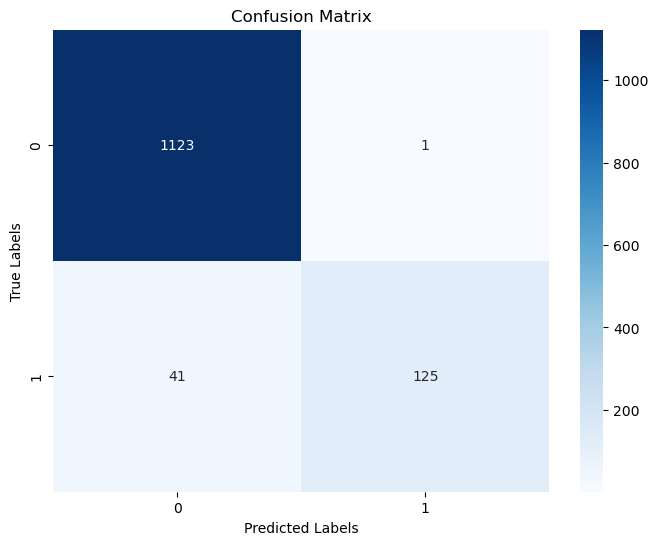

In [18]:
# Confusion Matrix:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [19]:
# Saving the Model:
nn.save('E-Mail_Detection.h5')

### Real World Examples:

In [20]:
def detect(model,string):
    string = string.lower()
    string = re.sub("[^a-z ]","",string)
    x = tvf.transform([string]).toarray()
    y = model.predict(x)
    print(y)
    if y >= 0.5:
        print("This is a Spam Mail.")
    else:
        print("This is a Real Mail.")
        
email_model = load_model("E-Mail_Detection.h5")  

In [21]:
message = "How to win cash price!! click on below link and redeem it."
detect(email_model, message)

1/1 [==============================] - 0s 145ms/step
[[0.99061674]]
This is a Spam Mail.


In [22]:
message = 'Congratulations!!!! You won a prize of $10000.'
detect(email_model, message)

1/1 [==============================] - 0s 28ms/step
[[0.8527088]]
This is a Spam Mail.


In [23]:
message = "I need the last month reports."
detect(email_model, message)

1/1 [==============================] - 0s 36ms/step
[[4.1047464e-05]]
This is a Real Mail.


## Case II: Using TensorFlow:

In [24]:
df = pd.read_csv('spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Data Preprocessing:

In [25]:
def get_seq(texts, tokenizer, train = True, max_seq_length = None):
    seq = tokenizer.texts_to_sequences(texts)
    if train == True:
        max_seq_length = np.max(list(map(len, seq)))
    seq = tf.keras.preprocessing.sequence.pad_sequences(seq, maxlen = max_seq_length, padding = 'post')
    return seq

# Takes a list of input texts, converts them into sequences of token IDs 
# using a provided tokenizer, optionally calculates the maximum sequence 
# length, pads the sequences to a uniform length, and returns the padded 
# sequences. 

In [26]:
def preprocessing(df):
    df = df.copy()
    df['Category'] = df['Category'].replace({"ham" : 0, "spam" : 1})
    X = df['Message']
    Y = df['Category']
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, shuffle = True, random_state = 1)
    tokenizer = tf.keras.preprocessing.text.Tokenizer()
    tokenizer.fit_on_texts(X_train)
    print('Vocab Length:' , len(tokenizer.word_index) + 1)
    X_train = get_seq(texts = X_train, tokenizer = tokenizer, train = True)
    X_test = get_seq(texts = X_test, tokenizer = tokenizer, train = False, max_seq_length = X_train.shape[1])
    print('Sequence Length:', X_train.shape[1])
    return X_train, X_test, y_train, y_test

### Data Modeling:

In [27]:
X_train, X_test, y_train, y_test = preprocessing(df)
X_train

Vocab Length: 7383
Sequence Length: 189


array([[  53,   21,   13, ...,    0,    0,    0],
       [ 918,    5, 1123, ...,    0,    0,    0],
       [1124,   58,   42, ...,    0,    0,    0],
       ...,
       [7377,    6, 7378, ...,    0,    0,    0],
       [  68,  167,  222, ...,    0,    0,    0],
       [ 104,  104,  206, ...,    0,    0,    0]])

In [28]:
inputs = tf.keras.Input(shape = (189, ))
x = tf.keras.layers.Embedding(input_dim = 7383, output_dim = 250)(inputs)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128, activation = 'relu')(x)
x = tf.keras.layers.Dense(128, activation = 'relu')(x)
outputs = tf.keras.layers.Dense(1, activation = 'sigmoid')(x)
model = tf.keras.Model(inputs = inputs, outputs = outputs)
model.compile(optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ["accuracy", tf.keras.metrics.AUC(name = 'auc')])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 189)]             0         
                                                                 
 embedding (Embedding)       (None, 189, 250)          1845750   
                                                                 
 flatten (Flatten)           (None, 47250)             0         
                                                                 
 dense_4 (Dense)             (None, 128)               6048128   
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 dense_6 (Dense)             (None, 1)                 129       
                                                                 
Total params: 7,910,519
Trainable params: 7,910,519
Non-train

In [29]:
history = model.fit(X_train, y_train,
    validation_split = 0.2,
    batch_size = 32,
    epochs = 100,
    callbacks = [
        tf.keras.callbacks.EarlyStopping(
        monitor = 'val_loss',
        patience = 6,
        restore_best_weights = True)])

Epoch 1/100
98/98 [==============================] - 10s 86ms/step - loss: 0.1789 - accuracy: 0.9301 - auc: 0.9360 - val_loss: 0.0746 - val_accuracy: 0.9795 - val_auc: 0.9847
Epoch 2/100
98/98 [==============================] - 8s 83ms/step - loss: 0.0233 - accuracy: 0.9933 - auc: 0.9974 - val_loss: 0.0696 - val_accuracy: 0.9808 - val_auc: 0.9806
Epoch 3/100
98/98 [==============================] - 8s 84ms/step - loss: 0.0035 - accuracy: 0.9994 - auc: 1.0000 - val_loss: 0.0875 - val_accuracy: 0.9808 - val_auc: 0.9753
Epoch 4/100
98/98 [==============================] - 8s 84ms/step - loss: 0.0022 - accuracy: 0.9997 - auc: 1.0000 - val_loss: 0.0983 - val_accuracy: 0.9782 - val_auc: 0.9714
Epoch 5/100
98/98 [==============================] - 8s 78ms/step - loss: 0.0012 - accuracy: 0.9997 - auc: 1.0000 - val_loss: 0.0965 - val_accuracy: 0.9808 - val_auc: 0.9714
Epoch 6/100
98/98 [==============================] - 8s 79ms/step - loss: 2.3265e-04 - accuracy: 1.0000 - auc: 1.0000 - val_loss:

In [30]:
results = model.evaluate(X_test, y_test, verbose = 0)
print(f'Accuracy: {round(results[1]*100, 4)} %')
print(f'AUC: {round(results[2],3)}')

Accuracy: 98.6842 %
AUC: 0.991


53/53 [==============================] - 1s 8ms/step


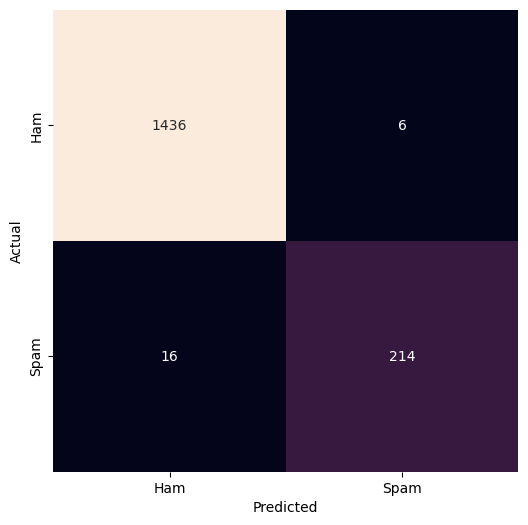

In [31]:
y_pred = np.squeeze(model.predict(X_test) >= 0.5).astype(np.int)
cm = confusion_matrix(y_test, y_pred,labels = [0,1])
clr = classification_report(y_test, y_pred, labels = [0,1], target_names = ['Ham', "Spam"])
plt.figure(figsize = (6,6))
sns.heatmap(cm, annot = True, fmt = 'g', cbar = False)
plt.xticks(ticks = [0.5, 1.5], labels = ['Ham', "Spam"])
plt.yticks(ticks = [0.5, 1.5], labels = ['Ham', "Spam"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [32]:
print(f'Classification Report:\n\n{clr}')

Classification Report:

              precision    recall  f1-score   support

         Ham       0.99      1.00      0.99      1442
        Spam       0.97      0.93      0.95       230

    accuracy                           0.99      1672
   macro avg       0.98      0.96      0.97      1672
weighted avg       0.99      0.99      0.99      1672

